In [1]:
# import the necessary packages
import numpy as np
import cv2
import os
from pathlib import Path
import fnmatch
import matplotlib.pyplot as plt
import csv
from PIL import Image, ImageOps

# FF5 analysis

In [2]:
dir_source = Path('C:/Users/kkanishk/Desktop/2019')  # note forward slash
print('Source dir: {}\n'.format(dir_source))
filenames = os.listdir(dir_source)
found_jpgs = []

for f in filenames:
    if fnmatch.fnmatch(f, '*.jpg'):
        f = os.path.join(dir_source, f)  # this works with imread
        found_jpgs.append(f)
print('Found {} JPGs'.format(len(found_jpgs)))

Source dir: C:\Users\kkanishk\Desktop\2019

Found 1448 JPGs


[C:\Users\kkanishk\Desktop\2019\CH-DAV_WEBCAM_FF5_0_1-201901010005.jpg] Blacks: [1080.] / Whites: [200.]


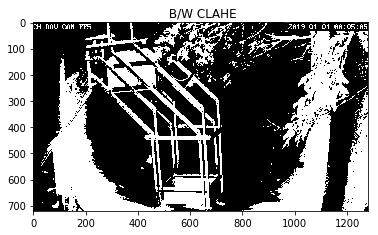

In [3]:
for jpg in found_jpgs:

    # Read file
    gray_img = cv2.imread(jpg, 0)  ## read in grayscale
    plt.imshow(gray_img, cmap="gray")  ## show in grayscale
    plt.title('Image in grayscale')
    
    
    
    # Create a CLAHE object (Arguments are optional)
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
    gray_img_clahe_normalized = clahe.apply(gray_img)    
    plt.imshow(gray_img_clahe_normalized, cmap="gray")  ## show in grayscale
    plt.title('CLAHE')
   
    
    # Normalize histogram
    gray_img_normalized = cv2.equalizeHist(gray_img)
    plt.imshow(gray_img_normalized, cmap="gray")
    plt.title('equalizeHist')

    
    
    # Create black & white image
    (thresh, bw_img) = cv2.threshold(gray_img_normalized, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(bw_img, cmap="gray")
    plt.title(' B/W equalizeHist')
 
    
    # Create black & white image
    (thresh, bw_img) = cv2.threshold(gray_img_clahe_normalized, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(bw_img, cmap="gray")
    plt.title(' B/W CLAHE')

    
    # Calculate and plot histogram
    # https://www.programcreek.com/python/example/89316/cv2.equalizeHist
    hist = cv2.calcHist(bw_img,[0],None,[256],[0,256])
    
    # Print black and white info
    blacks = hist[0]
    whites = hist[-1]
    print('[{}] Blacks: {} / Whites: {}'.format(jpg, blacks, whites))    
    break

 fraction_white_pixels 74%
 fraction_white_pixels 81%
 fraction_white_pixels 78%
 fraction_white_pixels 78%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 78%
 fraction_white_pixels 81%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 78%
 fraction_white_pixels 81%
 fraction_white_pixels 81%
 fraction_white_pixels 79%
 fraction_white_pixels 77%
 fraction_white_pixels 77%
 fraction_white_pixels 77%
 fraction_white_pixels 78%
 fraction_white_pixels 77%
 fraction_white_pixels 88%
 fraction_white_pixels 76%
 fraction_white_pixels 77%
 fraction_white_pixels 76%
 fraction_white_pixels 77%
 fraction_white_pixels 87%
 fraction_white_pixels 79%
 fraction_white_pixels 88%
 fraction_white_pixels 69%
 fraction_white_pixels 86%
 fraction_white_pixels 81%
 fraction_white_pixels 92%
 fraction_white_pixels 84%
 fraction_white_pixels 84%
 fraction_white_pixels 71%
 fraction_white_pixels 70%
 fraction_white_pixels 70%
 

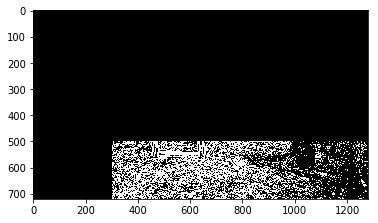

In [4]:
fraction_white_pixels_all1912 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)  
    if p.stem.endswith('1205'):  ## only noon pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image
        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]
        plt.imshow(masked_img,'gray')

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_all1912.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))
     

In [5]:
fraction_white_pixels_all1915 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('1505'):  ## only 15:05 pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_all1915.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 78%
 fraction_white_pixels 81%
 fraction_white_pixels 81%
 fraction_white_pixels 80%
 fraction_white_pixels 78%
 fraction_white_pixels 79%
 fraction_white_pixels 78%
 fraction_white_pixels 82%
 fraction_white_pixels 79%
 fraction_white_pixels 80%
 fraction_white_pixels 81%
 fraction_white_pixels 79%
 fraction_white_pixels 80%
 fraction_white_pixels 81%
 fraction_white_pixels 85%
 fraction_white_pixels 88%
 fraction_white_pixels 88%
 fraction_white_pixels 88%
 fraction_white_pixels 88%
 fraction_white_pixels 89%
 fraction_white_pixels 89%
 fraction_white_pixels 88%
 fraction_white_pixels 87%
 fraction_white_pixels 87%
 fraction_white_pixels 87%
 fraction_white_pixels 87%
 fraction_white_pixels 90%
 fraction_white_pixels 88%
 fraction_white_pixels 84%
 fraction_white_pixels 88%
 fraction_white_pixels 88%
 fraction_white_pixels 91%
 fraction_white_pixels 92%
 fraction_white_pixels 84%
 fraction_white_pixels 85%
 fraction_white_pixels 89%
 fraction_white_pixels 92%
 

In [6]:
fraction_white_pixels_all1909 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('0905'):  ## only 09:05am pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_all1909.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 76%
 fraction_white_pixels 80%
 fraction_white_pixels 79%
 fraction_white_pixels 80%
 fraction_white_pixels 80%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 80%
 fraction_white_pixels 80%
 fraction_white_pixels 79%
 fraction_white_pixels 78%
 fraction_white_pixels 83%
 fraction_white_pixels 83%
 fraction_white_pixels 82%
 fraction_white_pixels 84%
 fraction_white_pixels 86%
 fraction_white_pixels 86%
 fraction_white_pixels 88%
 fraction_white_pixels 88%
 fraction_white_pixels 88%
 fraction_white_pixels 88%
 fraction_white_pixels 88%
 fraction_white_pixels 87%
 fraction_white_pixels 87%
 fraction_white_pixels 87%
 fraction_white_pixels 87%
 fraction_white_pixels 86%
 fraction_white_pixels 82%
 fraction_white_pixels 87%
 fraction_white_pixels 88%
 fraction_white_pixels 92%
 fraction_white_pixels 79%
 fraction_white_pixels 84%
 fraction_white_pixels 84%
 fraction_white_pixels 88%
 fraction_white_pixels 90%
 

181
181
181


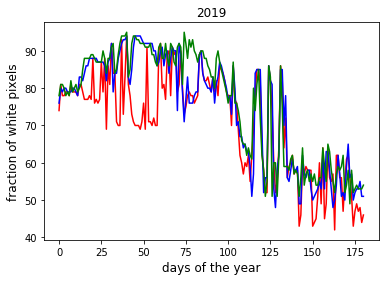

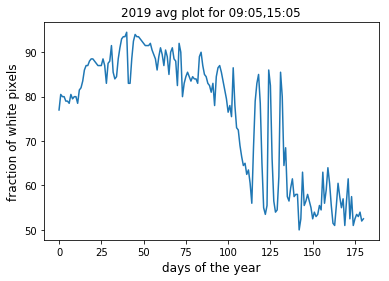

In [7]:
print(len(fraction_white_pixels_all1909))
print(len(fraction_white_pixels_all1912))
print(len(fraction_white_pixels_all1915))
plt.plot(fraction_white_pixels_all1912, 'r') # red for 12:05pm
plt.plot(fraction_white_pixels_all1909, 'b') # blue for 09:05am
plt.plot(fraction_white_pixels_all1915, 'g') # green for 15:05pm
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.title('2019')
plt.show()
fraction_white_pixels_avg19=np.zeros(len(fraction_white_pixels_all1909))
for i,snow in enumerate(fraction_white_pixels_all1909):
    fraction_white_pixels_avg19[i]=(fraction_white_pixels_all1909[i] + fraction_white_pixels_all1915[i])/2
plt.plot(fraction_white_pixels_avg19)
plt.title('2019 avg plot for 09:05,15:05')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()


In [8]:
dir_source = Path('C:/Users/kkanishk/Desktop/2018')  ## note forward slash
print('Source dir: {}\n'.format(dir_source))
filenames = os.listdir(dir_source)
found_jpgs = []

for f in filenames:
    if fnmatch.fnmatch(f, '*.jpg'):
        f = os.path.join(dir_source, f)  ## this works with imread
        found_jpgs.append(f)
print('Found {} JPGs'.format(len(found_jpgs)))

Source dir: C:\Users\kkanishk\Desktop\2018

Found 1448 JPGs


[C:\Users\kkanishk\Desktop\2018\CH-DAV_WEBCAM_FF5_0_1-201801010005.jpg] Blacks: [1094.] / Whites: [186.]


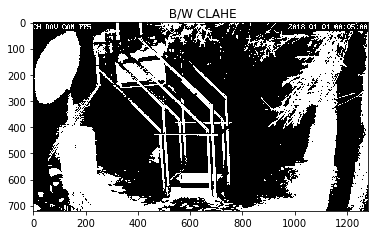

In [9]:
for jpg in found_jpgs:

    # Read file
    gray_img = cv2.imread(jpg, 0)  ## read in grayscale
    plt.imshow(gray_img, cmap="gray")  ## show in grayscale
    plt.title('Image in grayscale')
  
    
    
    # Create a CLAHE object (Arguments are optional)
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
    gray_img_clahe_normalized = clahe.apply(gray_img)    
    plt.imshow(gray_img_clahe_normalized, cmap="gray")  ## show in grayscale
    plt.title('CLAHE')
   
    
    
    # Normalize histogram
    gray_img_normalized = cv2.equalizeHist(gray_img)
    plt.imshow(gray_img_normalized, cmap="gray")
    plt.title('equalizeHist')
 
    
    
    # Create black & white image
    (thresh, bw_img) = cv2.threshold(gray_img_normalized, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(bw_img, cmap="gray")
    plt.title(' B/W equalizeHist')
   
    
    # Create black & white image
    (thresh, bw_img) = cv2.threshold(gray_img_clahe_normalized, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(bw_img, cmap="gray")
    plt.title(' B/W CLAHE')

    
    # Calculate and plot histogram
    # https://www.programcreek.com/python/example/89316/cv2.equalizeHist
    hist = cv2.calcHist(bw_img,[0],None,[256],[0,256])
    
    # Print black and white info
    blacks = hist[0]
    whites = hist[-1]
    print('[{}] Blacks: {} / Whites: {}'.format(jpg, blacks, whites))    
    break

In [10]:
fraction_white_pixels_all1812 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)
  
    if p.stem.endswith('1205'):  ## only noon pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_all1812.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 83%
 fraction_white_pixels 84%
 fraction_white_pixels 84%
 fraction_white_pixels 82%
 fraction_white_pixels 82%
 fraction_white_pixels 80%
 fraction_white_pixels 82%
 fraction_white_pixels 77%
 fraction_white_pixels 77%
 fraction_white_pixels 78%
 fraction_white_pixels 76%
 fraction_white_pixels 77%
 fraction_white_pixels 76%
 fraction_white_pixels 76%
 fraction_white_pixels 76%
 fraction_white_pixels 78%
 fraction_white_pixels 84%
 fraction_white_pixels 82%
 fraction_white_pixels 84%
 fraction_white_pixels 81%
 fraction_white_pixels 83%
 fraction_white_pixels 81%
 fraction_white_pixels 71%
 fraction_white_pixels 97%
 fraction_white_pixels 65%
 fraction_white_pixels 77%
 fraction_white_pixels 91%
 fraction_white_pixels 62%
 fraction_white_pixels 94%
 fraction_white_pixels 97%
 fraction_white_pixels 96%
 fraction_white_pixels 83%
 fraction_white_pixels 81%
 fraction_white_pixels 82%
 fraction_white_pixels 82%
 fraction_white_pixels 83%
 fraction_white_pixels 83%
 

In [11]:
fraction_white_pixels_all1815 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)
    
    if p.stem.endswith('1505'):  ## only 15:05am pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_all1815.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 83%
 fraction_white_pixels 83%
 fraction_white_pixels 85%
 fraction_white_pixels 83%
 fraction_white_pixels 86%
 fraction_white_pixels 84%
 fraction_white_pixels 82%
 fraction_white_pixels 80%
 fraction_white_pixels 80%
 fraction_white_pixels 80%
 fraction_white_pixels 80%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 83%
 fraction_white_pixels 83%
 fraction_white_pixels 84%
 fraction_white_pixels 83%
 fraction_white_pixels 83%
 fraction_white_pixels 62%
 fraction_white_pixels 66%
 fraction_white_pixels 70%
 fraction_white_pixels 62%
 fraction_white_pixels 65%
 fraction_white_pixels 53%
 fraction_white_pixels 64%
 fraction_white_pixels 56%
 fraction_white_pixels 59%
 fraction_white_pixels 52%
 fraction_white_pixels 83%
 fraction_white_pixels 82%
 fraction_white_pixels 82%
 fraction_white_pixels 82%
 fraction_white_pixels 83%
 fraction_white_pixels 84%
 

In [12]:
fraction_white_pixels_all1809 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('0905'):  ## only 09:05am pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_all1809.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 83%
 fraction_white_pixels 84%
 fraction_white_pixels 82%
 fraction_white_pixels 84%
 fraction_white_pixels 87%
 fraction_white_pixels 84%
 fraction_white_pixels 83%
 fraction_white_pixels 81%
 fraction_white_pixels 78%
 fraction_white_pixels 80%
 fraction_white_pixels 80%
 fraction_white_pixels 81%
 fraction_white_pixels 80%
 fraction_white_pixels 80%
 fraction_white_pixels 80%
 fraction_white_pixels 80%
 fraction_white_pixels 83%
 fraction_white_pixels 83%
 fraction_white_pixels 82%
 fraction_white_pixels 82%
 fraction_white_pixels 82%
 fraction_white_pixels 82%
 fraction_white_pixels 59%
 fraction_white_pixels 59%
 fraction_white_pixels 57%
 fraction_white_pixels 60%
 fraction_white_pixels 59%
 fraction_white_pixels 61%
 fraction_white_pixels 62%
 fraction_white_pixels 61%
 fraction_white_pixels 64%
 fraction_white_pixels 83%
 fraction_white_pixels 80%
 fraction_white_pixels 82%
 fraction_white_pixels 83%
 fraction_white_pixels 83%
 fraction_white_pixels 83%
 

181
181
181


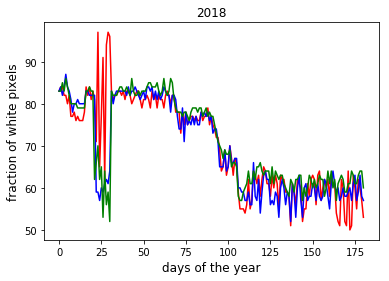

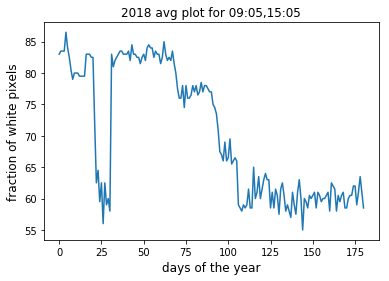

In [13]:
print(len(fraction_white_pixels_all1812))
print(len(fraction_white_pixels_all1809))
print(len(fraction_white_pixels_all1815))
plt.plot(fraction_white_pixels_all1812, 'r') # red for 12:05pm 
plt.plot(fraction_white_pixels_all1809, 'b') # blue for 09:05am
plt.plot(fraction_white_pixels_all1815, 'g') # green for 15:05pm
plt.title('2018')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()
fraction_white_pixels_avg18=np.zeros(len(fraction_white_pixels_all1809))
for i,snow in enumerate(fraction_white_pixels_all1809):
    fraction_white_pixels_avg18[i]=(fraction_white_pixels_all1809[i] + fraction_white_pixels_all1815[i])/2
plt.plot(fraction_white_pixels_avg18)
plt.title('2018 avg plot for 09:05,15:05')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()

In [14]:
dir_source = Path('C:/Users/kkanishk/Desktop/2017')  ## note forward slash
print('Source dir: {}\n'.format(dir_source))
filenames = os.listdir(dir_source)
found_jpgs = []

for f in filenames:
    if fnmatch.fnmatch(f, '*.jpg'):
        f = os.path.join(dir_source, f)  ## this works with imread
        found_jpgs.append(f)
        
print('Found {} JPGs'.format(len(found_jpgs)))

Source dir: C:\Users\kkanishk\Desktop\2017

Found 1294 JPGs


[C:\Users\kkanishk\Desktop\2017\CH-DAV_WEBCAM_FF5_0_1-201701010005.jpg] Blacks: [979.] / Whites: [301.]


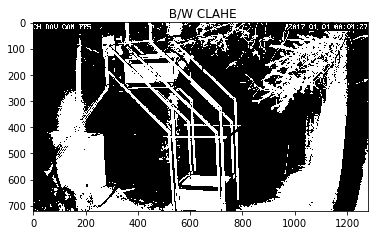

In [15]:
for jpg in found_jpgs:

    # Read file
    gray_img = cv2.imread(jpg, 0)  ## read in grayscale
    plt.imshow(gray_img, cmap="gray")  ## show in grayscale
    plt.title('Image in grayscale')
   
    
    
    # Create a CLAHE object (Arguments are optional)
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
    gray_img_clahe_normalized = clahe.apply(gray_img)    
    plt.imshow(gray_img_clahe_normalized, cmap="gray")  ## show in grayscale
    plt.title('CLAHE')
    
    
    
    # Normalize histogram
    gray_img_normalized = cv2.equalizeHist(gray_img)
    plt.imshow(gray_img_normalized, cmap="gray")
    plt.title('equalizeHist')
 
    
    
    # Create black & white image
    (thresh, bw_img) = cv2.threshold(gray_img_normalized, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(bw_img, cmap="gray")
    plt.title(' B/W equalizeHist')
  
    
    # Create black & white image
    (thresh, bw_img) = cv2.threshold(gray_img_clahe_normalized, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(bw_img, cmap="gray")
    plt.title(' B/W CLAHE')
   
    
    # Calculate and plot histogram
    # https://www.programcreek.com/python/example/89316/cv2.equalizeHist
    hist = cv2.calcHist(bw_img,[0],None,[256],[0,256])
    
    # Print black and white info
    blacks = hist[0]
    whites = hist[-1]
    print('[{}] Blacks: {} / Whites: {}'.format(jpg, blacks, whites))    
    break

In [16]:
fraction_white_pixels_all1712 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)
   
    if p.stem.endswith('1205'):  ## only noon pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_all1712.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 59%
 fraction_white_pixels 64%
 fraction_white_pixels 69%
 fraction_white_pixels 77%
 fraction_white_pixels 83%
 fraction_white_pixels 77%
 fraction_white_pixels 83%
 fraction_white_pixels 82%
 fraction_white_pixels 77%
 fraction_white_pixels 83%
 fraction_white_pixels 80%
 fraction_white_pixels 80%
 fraction_white_pixels 85%
 fraction_white_pixels 81%
 fraction_white_pixels 80%
 fraction_white_pixels 82%
 fraction_white_pixels 82%
 fraction_white_pixels 81%
 fraction_white_pixels 81%
 fraction_white_pixels 81%
 fraction_white_pixels 80%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 78%
 fraction_white_pixels 78%
 fraction_white_pixels 78%
 fraction_white_pixels 78%
 fraction_white_pixels 79%
 fraction_white_pixels 77%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 83%
 fraction_white_pixels 82%
 fraction_white_pixels 81%
 fraction_white_pixels 81%
 fraction_white_pixels 81%
 fraction_white_pixels 80%
 

In [17]:
fraction_white_pixels_all1709 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)
   
    if p.stem.endswith('0905'):  ## only 09:05 pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_all1709.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 67%
 fraction_white_pixels 67%
 fraction_white_pixels 73%
 fraction_white_pixels 76%
 fraction_white_pixels 81%
 fraction_white_pixels 82%
 fraction_white_pixels 83%
 fraction_white_pixels 82%
 fraction_white_pixels 82%
 fraction_white_pixels 83%
 fraction_white_pixels 83%
 fraction_white_pixels 83%
 fraction_white_pixels 85%
 fraction_white_pixels 81%
 fraction_white_pixels 82%
 fraction_white_pixels 84%
 fraction_white_pixels 84%
 fraction_white_pixels 84%
 fraction_white_pixels 84%
 fraction_white_pixels 84%
 fraction_white_pixels 84%
 fraction_white_pixels 83%
 fraction_white_pixels 82%
 fraction_white_pixels 81%
 fraction_white_pixels 81%
 fraction_white_pixels 81%
 fraction_white_pixels 81%
 fraction_white_pixels 79%
 fraction_white_pixels 80%
 fraction_white_pixels 81%
 fraction_white_pixels 78%
 fraction_white_pixels 82%
 fraction_white_pixels 82%
 fraction_white_pixels 82%
 fraction_white_pixels 81%
 fraction_white_pixels 81%
 fraction_white_pixels 79%
 

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:245: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


In [18]:
fraction_white_pixels_all1715=[]
dir_source = Path('C:/Users/kkanishk/Desktop/2017')
filenames = os.listdir(dir_source)
for filename in filenames:
    p=Path(filename)
    if p.stem.endswith('1505'):  ## only 15:05pm pics
        full_path = dir_source / filename
        full_path=str(full_path)
        im = cv2.imread(full_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
        gray_img_clahe_normalized = clahe.apply(im_gray) 
        im_gray = cv2.equalizeHist(im_gray)
        (thresh, blackAndWhiteImage) = cv2.threshold(im_gray, 127, 255, cv2.THRESH_BINARY)
        hist = cv2.calcHist(blackAndWhiteImage,[0],None,[256],[0,256])
        mask = np.zeros(blackAndWhiteImage.shape[:2],dtype='uint8')
        mask[500:, 300:] = 255
        masked_img = cv2.bitwise_and(blackAndWhiteImage,blackAndWhiteImage,mask = mask)   
        hist_full = cv2.calcHist(blackAndWhiteImage,[0],None,[256],[0,256])
        hist_mask = cv2.calcHist([blackAndWhiteImage],[0],mask,[256],[0,256])
        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]
        total_pixels = snow_pixels + other_pixels
        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_all1715.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 56%
 fraction_white_pixels 57%
 fraction_white_pixels 62%
 fraction_white_pixels 74%
 fraction_white_pixels 73%
 fraction_white_pixels 74%
 fraction_white_pixels 76%
 fraction_white_pixels 73%
 fraction_white_pixels 76%
 fraction_white_pixels 78%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 80%
 fraction_white_pixels 72%
 fraction_white_pixels 76%
 fraction_white_pixels 78%
 fraction_white_pixels 77%
 fraction_white_pixels 80%
 fraction_white_pixels 82%
 fraction_white_pixels 81%
 fraction_white_pixels 80%
 fraction_white_pixels 79%
 fraction_white_pixels 78%
 fraction_white_pixels 78%
 fraction_white_pixels 78%
 fraction_white_pixels 78%
 fraction_white_pixels 78%
 fraction_white_pixels 77%
 fraction_white_pixels 77%
 fraction_white_pixels 77%
 fraction_white_pixels 78%
 fraction_white_pixels 80%
 fraction_white_pixels 79%
 fraction_white_pixels 78%
 fraction_white_pixels 78%
 fraction_white_pixels 78%
 fraction_white_pixels 76%
 

173
150
173


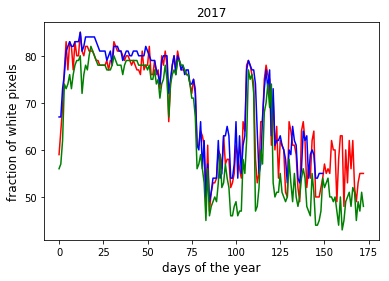

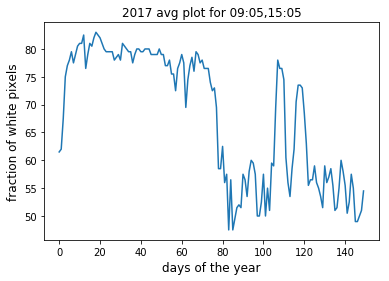

In [19]:
print(len(fraction_white_pixels_all1712))
print(len(fraction_white_pixels_all1709))
print(len(fraction_white_pixels_all1715))
plt.plot(fraction_white_pixels_all1712, 'r') #red is at 12:05 
plt.plot(fraction_white_pixels_all1709, 'b') # blue is at 09:05 
plt.plot(fraction_white_pixels_all1715, 'g') # blue is at 09:05
plt.title('2017')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()
fraction_white_pixels_avg17=np.zeros(len(fraction_white_pixels_all1709))
for i,snow in enumerate(fraction_white_pixels_all1709):
    fraction_white_pixels_avg17[i]=(fraction_white_pixels_all1709[i] + fraction_white_pixels_all1715[i])/2
plt.plot(fraction_white_pixels_avg17)
plt.title('2017 avg plot for 09:05,15:05')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()

Text(0, 0.5, 'fraction of white pixels')

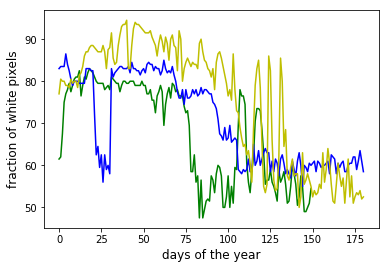

In [20]:
plt.plot(fraction_white_pixels_avg17, 'g') # red for 2017
plt.plot(fraction_white_pixels_avg18, 'b') # blue for 2018
plt.plot(fraction_white_pixels_avg19, 'y') # green for 2019
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)

# FF1 analysis

In [21]:
dir_source = Path('C:/Users/kkanishk/Desktop/FF12019')  # note forward slash
print('Source dir: {}\n'.format(dir_source))
filenames = os.listdir(dir_source)
found_jpgs = []

for f in filenames:
    if fnmatch.fnmatch(f, '*.jpg'):
        f = os.path.join(dir_source, f)  # this works with imread
        found_jpgs.append(f)
print('Found {} JPGs'.format(len(found_jpgs)))

Source dir: C:\Users\kkanishk\Desktop\FF12019

Found 1448 JPGs


[C:\Users\kkanishk\Desktop\FF12019\CH-DAV_WEBCAM_FF1_0_1-201901010001.jpg] Blacks: [704.] / Whites: [576.]


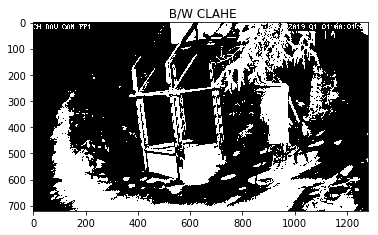

In [22]:
for jpg in found_jpgs:

    # Read file
    gray_img = cv2.imread(jpg, 0)  ## read in grayscale
    plt.imshow(gray_img, cmap="gray")  ## show in grayscale
    plt.title('Image in grayscale')
   
    
    
    # Create a CLAHE object (Arguments are optional)
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
    gray_img_clahe_normalized = clahe.apply(gray_img)    
    plt.imshow(gray_img_clahe_normalized, cmap="gray")  ## show in grayscale
    plt.title('CLAHE')
    
    
    
    # Normalize histogram
    gray_img_normalized = cv2.equalizeHist(gray_img)
    plt.imshow(gray_img_normalized, cmap="gray")
    plt.title('equalizeHist')

    
    
    # Create black & white image
    (thresh, bw_img) = cv2.threshold(gray_img_normalized, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(bw_img, cmap="gray")
    plt.title(' B/W equalizeHist')
    
    
    # Create black & white image
    (thresh, bw_img) = cv2.threshold(gray_img_clahe_normalized, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(bw_img, cmap="gray")
    plt.title(' B/W CLAHE')
    
    
    # Calculate and plot histogram
    # https://www.programcreek.com/python/example/89316/cv2.equalizeHist
    hist = cv2.calcHist(bw_img,[0],None,[256],[0,256])
    
    # Print black and white info
    blacks = hist[0]
    whites = hist[-1]
    print('[{}] Blacks: {} / Whites: {}'.format(jpg, blacks, whites))    
    break

 fraction_white_pixels 81%
 fraction_white_pixels 88%
 fraction_white_pixels 88%
 fraction_white_pixels 87%
 fraction_white_pixels 86%
 fraction_white_pixels 86%
 fraction_white_pixels 86%
 fraction_white_pixels 91%
 fraction_white_pixels 91%
 fraction_white_pixels 91%
 fraction_white_pixels 89%
 fraction_white_pixels 85%
 fraction_white_pixels 88%
 fraction_white_pixels 86%
 fraction_white_pixels 84%
 fraction_white_pixels 82%
 fraction_white_pixels 86%
 fraction_white_pixels 83%
 fraction_white_pixels 84%
 fraction_white_pixels 82%
 fraction_white_pixels 91%
 fraction_white_pixels 81%
 fraction_white_pixels 83%
 fraction_white_pixels 83%
 fraction_white_pixels 82%
 fraction_white_pixels 90%
 fraction_white_pixels 89%
 fraction_white_pixels 93%
 fraction_white_pixels 83%
 fraction_white_pixels 89%
 fraction_white_pixels 86%
 fraction_white_pixels 92%
 fraction_white_pixels 88%
 fraction_white_pixels 86%
 fraction_white_pixels 73%
 fraction_white_pixels 71%
 fraction_white_pixels 77%
 

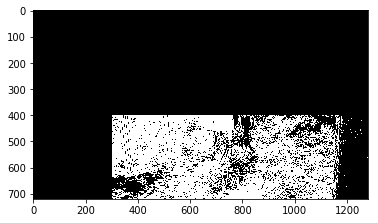

In [23]:
fraction_white_pixels_allf11912 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[400:, 300:] = 255

for jpg in found_jpgs:
    p = Path(jpg)  
    if p.stem.endswith('1201'):  ## only noon pics
        
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image
        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]
        
        plt.imshow(masked_img,'gray')

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allf11912.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))
        

In [24]:
fraction_white_pixels_allf11915 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('1501'):  ## only 15:01 pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allf11915.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 93%
 fraction_white_pixels 94%
 fraction_white_pixels 94%
 fraction_white_pixels 94%
 fraction_white_pixels 88%
 fraction_white_pixels 91%
 fraction_white_pixels 94%
 fraction_white_pixels 97%
 fraction_white_pixels 96%
 fraction_white_pixels 97%
 fraction_white_pixels 97%
 fraction_white_pixels 95%
 fraction_white_pixels 82%
 fraction_white_pixels 84%
 fraction_white_pixels 89%
 fraction_white_pixels 90%
 fraction_white_pixels 95%
 fraction_white_pixels 90%
 fraction_white_pixels 90%
 fraction_white_pixels 92%
 fraction_white_pixels 93%
 fraction_white_pixels 91%
 fraction_white_pixels 92%
 fraction_white_pixels 92%
 fraction_white_pixels 92%
 fraction_white_pixels 90%
 fraction_white_pixels 92%
 fraction_white_pixels 91%
 fraction_white_pixels 88%
 fraction_white_pixels 88%
 fraction_white_pixels 93%
 fraction_white_pixels 91%
 fraction_white_pixels 90%
 fraction_white_pixels 87%
 fraction_white_pixels 88%
 fraction_white_pixels 87%
 fraction_white_pixels 87%
 

In [25]:
fraction_white_pixels_allf11909 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('0901'):  ## only 09:01am pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allf11909.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 92%
 fraction_white_pixels 94%
 fraction_white_pixels 94%
 fraction_white_pixels 94%
 fraction_white_pixels 93%
 fraction_white_pixels 92%
 fraction_white_pixels 92%
 fraction_white_pixels 92%
 fraction_white_pixels 96%
 fraction_white_pixels 97%
 fraction_white_pixels 96%
 fraction_white_pixels 88%
 fraction_white_pixels 96%
 fraction_white_pixels 86%
 fraction_white_pixels 86%
 fraction_white_pixels 89%
 fraction_white_pixels 89%
 fraction_white_pixels 98%
 fraction_white_pixels 89%
 fraction_white_pixels 89%
 fraction_white_pixels 90%
 fraction_white_pixels 91%
 fraction_white_pixels 93%
 fraction_white_pixels 96%
 fraction_white_pixels 93%
 fraction_white_pixels 89%
 fraction_white_pixels 91%
 fraction_white_pixels 93%
 fraction_white_pixels 89%
 fraction_white_pixels 88%
 fraction_white_pixels 90%
 fraction_white_pixels 91%
 fraction_white_pixels 81%
 fraction_white_pixels 86%
 fraction_white_pixels 88%
 fraction_white_pixels 87%
 fraction_white_pixels 87%
 

181
181
181


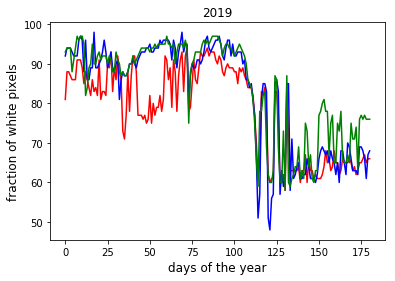

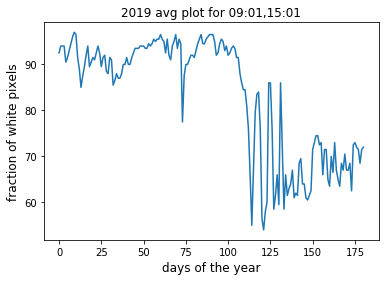

In [26]:
print(len(fraction_white_pixels_allf11909))
print(len(fraction_white_pixels_allf11912))
print(len(fraction_white_pixels_allf11915))
plt.plot(fraction_white_pixels_allf11912, 'r') # red for 12:05pm
plt.plot(fraction_white_pixels_allf11909, 'b') # blue for 09:05am
plt.plot(fraction_white_pixels_allf11915, 'g') # green for 15:05pm
plt.title('2019')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()
fraction_white_pixels_avgf119=np.zeros(len(fraction_white_pixels_allf11909))
for i,snow in enumerate(fraction_white_pixels_allf11909):
    fraction_white_pixels_avgf119[i]=(fraction_white_pixels_allf11909[i] + fraction_white_pixels_allf11915[i])/2
plt.plot(fraction_white_pixels_avgf119)
plt.title('2019 avg plot for 09:01,15:01')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()


In [27]:
dir_source = Path('C:/Users/kkanishk/Desktop/FF1 2018')  # note forward slash
print('Source dir: {}\n'.format(dir_source))
filenames = os.listdir(dir_source)
found_jpgs = []

for f in filenames:
    if fnmatch.fnmatch(f, '*.jpg'):
        f = os.path.join(dir_source, f)  # this works with imread
        found_jpgs.append(f)
print('Found {} JPGs'.format(len(found_jpgs)))

Source dir: C:\Users\kkanishk\Desktop\FF1 2018

Found 1448 JPGs


In [28]:
fraction_white_pixels_allf11812 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)
  
    if p.stem.endswith('1201'):  ## only noon pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allf11812.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 89%
 fraction_white_pixels 90%
 fraction_white_pixels 91%
 fraction_white_pixels 89%
 fraction_white_pixels 82%
 fraction_white_pixels 91%
 fraction_white_pixels 92%
 fraction_white_pixels 92%
 fraction_white_pixels 83%
 fraction_white_pixels 93%
 fraction_white_pixels 92%
 fraction_white_pixels 94%
 fraction_white_pixels 94%
 fraction_white_pixels 78%
 fraction_white_pixels 76%
 fraction_white_pixels 94%
 fraction_white_pixels 95%
 fraction_white_pixels 92%
 fraction_white_pixels 93%
 fraction_white_pixels 91%
 fraction_white_pixels 83%
 fraction_white_pixels 68%
 fraction_white_pixels 67%
 fraction_white_pixels 68%
 fraction_white_pixels 77%
 fraction_white_pixels 76%
 fraction_white_pixels 73%
 fraction_white_pixels 87%
 fraction_white_pixels 74%
 fraction_white_pixels 75%
 fraction_white_pixels 81%
 fraction_white_pixels 89%
 fraction_white_pixels 81%
 fraction_white_pixels 86%
 fraction_white_pixels 89%
 fraction_white_pixels 90%
 fraction_white_pixels 93%
 

In [29]:
fraction_white_pixels_allf11815 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)
    
    if p.stem.endswith('1501'):  ## only 15:05am pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allf11815.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 89%
 fraction_white_pixels 90%
 fraction_white_pixels 90%
 fraction_white_pixels 88%
 fraction_white_pixels 92%
 fraction_white_pixels 94%
 fraction_white_pixels 96%
 fraction_white_pixels 95%
 fraction_white_pixels 94%
 fraction_white_pixels 95%
 fraction_white_pixels 94%
 fraction_white_pixels 95%
 fraction_white_pixels 95%
 fraction_white_pixels 95%
 fraction_white_pixels 95%
 fraction_white_pixels 94%
 fraction_white_pixels 95%
 fraction_white_pixels 91%
 fraction_white_pixels 95%
 fraction_white_pixels 91%
 fraction_white_pixels 83%
 fraction_white_pixels 73%
 fraction_white_pixels 76%
 fraction_white_pixels 79%
 fraction_white_pixels 80%
 fraction_white_pixels 85%
 fraction_white_pixels 85%
 fraction_white_pixels 86%
 fraction_white_pixels 88%
 fraction_white_pixels 89%
 fraction_white_pixels 93%
 fraction_white_pixels 85%
 fraction_white_pixels 86%
 fraction_white_pixels 86%
 fraction_white_pixels 90%
 fraction_white_pixels 89%
 fraction_white_pixels 92%
 

In [30]:
fraction_white_pixels_allf11809 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('0901'):  ## only 09:05am pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allf11809.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 89%
 fraction_white_pixels 90%
 fraction_white_pixels 90%
 fraction_white_pixels 90%
 fraction_white_pixels 93%
 fraction_white_pixels 92%
 fraction_white_pixels 93%
 fraction_white_pixels 96%
 fraction_white_pixels 94%
 fraction_white_pixels 95%
 fraction_white_pixels 95%
 fraction_white_pixels 95%
 fraction_white_pixels 95%
 fraction_white_pixels 95%
 fraction_white_pixels 95%
 fraction_white_pixels 95%
 fraction_white_pixels 94%
 fraction_white_pixels 93%
 fraction_white_pixels 94%
 fraction_white_pixels 90%
 fraction_white_pixels 84%
 fraction_white_pixels 70%
 fraction_white_pixels 71%
 fraction_white_pixels 79%
 fraction_white_pixels 78%
 fraction_white_pixels 82%
 fraction_white_pixels 85%
 fraction_white_pixels 87%
 fraction_white_pixels 88%
 fraction_white_pixels 89%
 fraction_white_pixels 88%
 fraction_white_pixels 90%
 fraction_white_pixels 86%
 fraction_white_pixels 85%
 fraction_white_pixels 89%
 fraction_white_pixels 92%
 fraction_white_pixels 92%
 

181
181
181


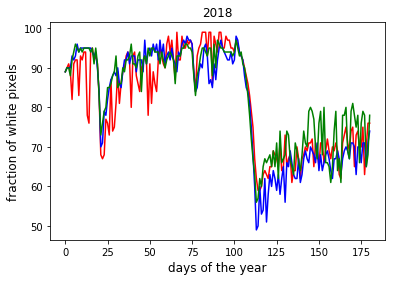

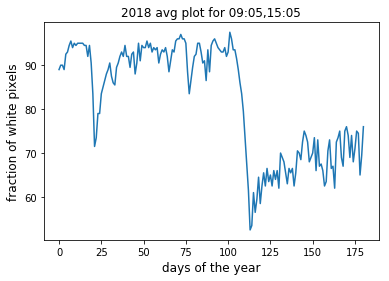

In [31]:
print(len(fraction_white_pixels_allf11812))
print(len(fraction_white_pixels_allf11809))
print(len(fraction_white_pixels_allf11815))
plt.plot(fraction_white_pixels_allf11812, 'r') # red for 12:05pm 
plt.plot(fraction_white_pixels_allf11809, 'b') # blue for 09:05am
plt.plot(fraction_white_pixels_allf11815, 'g') # green for 15:05pm
plt.title('2018')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()
fraction_white_pixels_avgf118=np.zeros(len(fraction_white_pixels_allf11809))
for i,snow in enumerate(fraction_white_pixels_allf11809):
    fraction_white_pixels_avgf118[i]=(fraction_white_pixels_allf11809[i] + fraction_white_pixels_allf11815[i])/2
plt.plot(fraction_white_pixels_avgf118)
plt.title('2018 avg plot for 09:05,15:05')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()

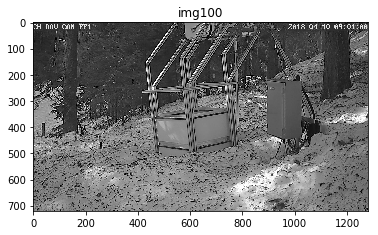

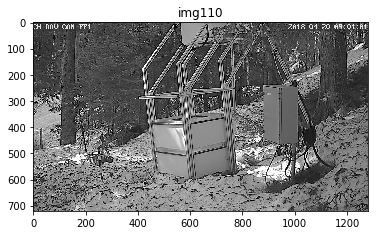

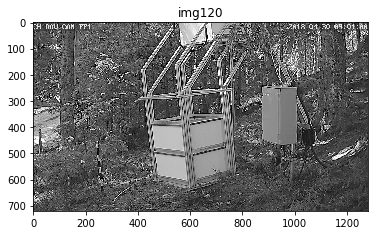

In [62]:
img100=cv2.imread('C:/users/kkanishk/Desktop/FF1 2018/CH-DAV_WEBCAM_FF1_0_1-201804100901.jpg',0)
plt.imshow(img100, cmap='gray') 
plt.title('img100')
plt.show()
img110=cv2.imread('C:/users/kkanishk/Desktop/FF1 2018/CH-DAV_WEBCAM_FF1_0_1-201804200901.jpg',0)
plt.imshow(img110, cmap='gray') 
plt.title('img110')
plt.show()
img120=cv2.imread('C:/users/kkanishk/Desktop/FF1 2018/CH-DAV_WEBCAM_FF1_0_1-201804300901.jpg',0)
plt.imshow(img120, cmap='gray') 
plt.title('img120')
plt.show()

*We can clearly see how the amount of snow in image no. 100 is more than that in image no. 110 and its least in image no. 120. This is exactly what plot shows, MELTING OF SNOW.*

In [32]:
dir_source = Path('C:/Users/kkanishk/Desktop/FF1 2017')  # note forward slash
print('Source dir: {}\n'.format(dir_source))
filenames = os.listdir(dir_source)
found_jpgs = []

for f in filenames:
    if fnmatch.fnmatch(f, '*.jpg'):
        f = os.path.join(dir_source, f)  # this works with imread
        found_jpgs.append(f)
print('Found {} JPGs'.format(len(found_jpgs)))

Source dir: C:\Users\kkanishk\Desktop\FF1 2017

Found 1383 JPGs


In [33]:
fraction_white_pixels_allf11709 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('0901'):  ## only 09:05am pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allf11709.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 67%
 fraction_white_pixels 67%
 fraction_white_pixels 78%
 fraction_white_pixels 79%
 fraction_white_pixels 86%
 fraction_white_pixels 89%
 fraction_white_pixels 88%
 fraction_white_pixels 87%
 fraction_white_pixels 87%
 fraction_white_pixels 88%
 fraction_white_pixels 87%
 fraction_white_pixels 87%
 fraction_white_pixels 89%
 fraction_white_pixels 87%
 fraction_white_pixels 88%
 fraction_white_pixels 89%
 fraction_white_pixels 90%
 fraction_white_pixels 91%
 fraction_white_pixels 90%
 fraction_white_pixels 92%
 fraction_white_pixels 92%
 fraction_white_pixels 92%
 fraction_white_pixels 93%
 fraction_white_pixels 93%
 fraction_white_pixels 93%
 fraction_white_pixels 93%
 fraction_white_pixels 93%
 fraction_white_pixels 92%
 fraction_white_pixels 93%
 fraction_white_pixels 92%
 fraction_white_pixels 90%
 fraction_white_pixels 81%
 fraction_white_pixels 94%
 fraction_white_pixels 94%
 fraction_white_pixels 93%
 fraction_white_pixels 93%
 fraction_white_pixels 88%
 

In [34]:
fraction_white_pixels_allf11712 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('1201'):  ## only 12:05am pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allf11712.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 63%
 fraction_white_pixels 67%
 fraction_white_pixels 74%
 fraction_white_pixels 83%
 fraction_white_pixels 88%
 fraction_white_pixels 85%
 fraction_white_pixels 89%
 fraction_white_pixels 87%
 fraction_white_pixels 84%
 fraction_white_pixels 87%
 fraction_white_pixels 85%
 fraction_white_pixels 85%
 fraction_white_pixels 90%
 fraction_white_pixels 87%
 fraction_white_pixels 88%
 fraction_white_pixels 86%
 fraction_white_pixels 87%
 fraction_white_pixels 87%
 fraction_white_pixels 88%
 fraction_white_pixels 90%
 fraction_white_pixels 90%
 fraction_white_pixels 90%
 fraction_white_pixels 90%
 fraction_white_pixels 90%
 fraction_white_pixels 90%
 fraction_white_pixels 90%
 fraction_white_pixels 89%
 fraction_white_pixels 92%
 fraction_white_pixels 89%
 fraction_white_pixels 92%
 fraction_white_pixels 90%
 fraction_white_pixels 92%
 fraction_white_pixels 94%
 fraction_white_pixels 93%
 fraction_white_pixels 94%
 fraction_white_pixels 93%
 fraction_white_pixels 88%
 

In [35]:
fraction_white_pixels_allf11715 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('1501'):  ## only 15:05am pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allf11715.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 66%
 fraction_white_pixels 66%
 fraction_white_pixels 77%
 fraction_white_pixels 82%
 fraction_white_pixels 88%
 fraction_white_pixels 89%
 fraction_white_pixels 89%
 fraction_white_pixels 87%
 fraction_white_pixels 87%
 fraction_white_pixels 87%
 fraction_white_pixels 85%
 fraction_white_pixels 86%
 fraction_white_pixels 90%
 fraction_white_pixels 88%
 fraction_white_pixels 89%
 fraction_white_pixels 90%
 fraction_white_pixels 91%
 fraction_white_pixels 92%
 fraction_white_pixels 92%
 fraction_white_pixels 92%
 fraction_white_pixels 92%
 fraction_white_pixels 92%
 fraction_white_pixels 93%
 fraction_white_pixels 93%
 fraction_white_pixels 93%
 fraction_white_pixels 93%
 fraction_white_pixels 92%
 fraction_white_pixels 93%
 fraction_white_pixels 92%
 fraction_white_pixels 92%
 fraction_white_pixels 92%
 fraction_white_pixels 94%
 fraction_white_pixels 93%
 fraction_white_pixels 94%
 fraction_white_pixels 93%
 fraction_white_pixels 93%
 fraction_white_pixels 88%
 

173
173
173


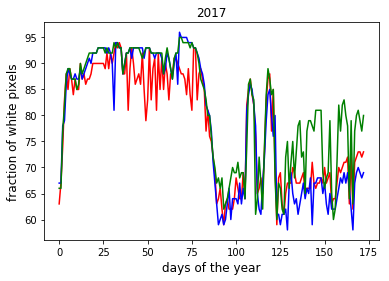

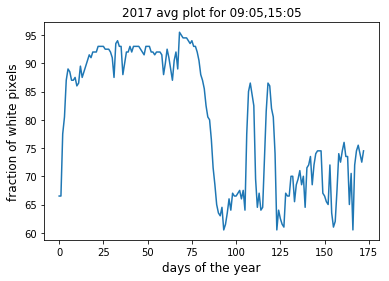

In [36]:
print(len(fraction_white_pixels_allf11712))
print(len(fraction_white_pixels_allf11709))
print(len(fraction_white_pixels_allf11715))
plt.plot(fraction_white_pixels_allf11712, 'r') #red is at 12:05 
plt.plot(fraction_white_pixels_allf11709, 'b') # blue is at 09:05 
plt.plot(fraction_white_pixels_allf11715, 'g') # blue is at 09:05
plt.title('2017')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()
fraction_white_pixels_avgf117=np.zeros(len(fraction_white_pixels_allf11709))
for i,snow in enumerate(fraction_white_pixels_allf11709):
    fraction_white_pixels_avgf117[i]=(fraction_white_pixels_allf11709[i] + fraction_white_pixels_allf11715[i])/2
plt.plot(fraction_white_pixels_avgf117)
plt.title('2017 avg plot for 09:05,15:05')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()

Text(0, 0.5, 'fraction of white pixels')

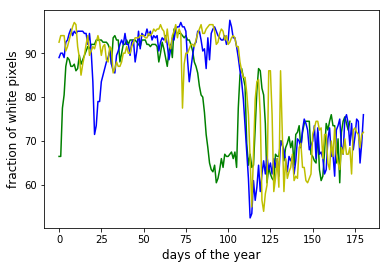

In [57]:
plt.plot(fraction_white_pixels_avgf117, 'g') # red for 2017
plt.plot(fraction_white_pixels_avgf118, 'b') # blue for 2018
plt.plot(fraction_white_pixels_avgf119, 'y') # green for 2019
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)

# SNOW COVER ON TREES

In [38]:
dir_source = Path('C:/Users/kkanishk/Desktop/webcam 2019')  # note forward slash
print('Source dir: {}\n'.format(dir_source))
filenames = os.listdir(dir_source)
found_jpgs = []

for f in filenames:
    if fnmatch.fnmatch(f, '*.jpg'):
        f = os.path.join(dir_source, f)  # this works with imread
        found_jpgs.append(f)
print('Found {} JPGs'.format(len(found_jpgs)))

Source dir: C:\Users\kkanishk\Desktop\webcam 2019

Found 2160 JPGs


[C:\Users\kkanishk\Desktop\webcam 2019\CH-DAV_WEBCAM_T1_35_1-201901010700.jpg] Blacks: [2592.] / Whites: [0.]


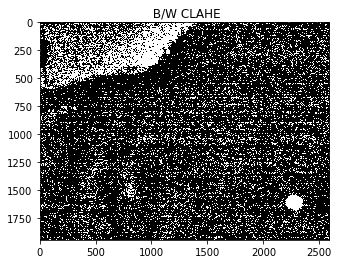

In [39]:
for jpg in found_jpgs:

    # Read file
    gray_img = cv2.imread(jpg, 0)  ## read in grayscale
    plt.imshow(gray_img, cmap="gray")  ## show in grayscale
    plt.title('Image in grayscale')
   
    
    
    # Create a CLAHE object (Arguments are optional)
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
    gray_img_clahe_normalized = clahe.apply(gray_img)    
    plt.imshow(gray_img_clahe_normalized, cmap="gray")  ## show in grayscale
    plt.title('CLAHE')
    
    
    # Normalize histogram
    gray_img_normalized = cv2.equalizeHist(gray_img)
    plt.imshow(gray_img_normalized, cmap="gray")
    plt.title('equalizeHist')
    
    
    
    # Create black & white image
    (thresh, bw_img) = cv2.threshold(gray_img_normalized, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(bw_img, cmap="gray")
    plt.title(' B/W equalizeHist')
   
    
    # Create black & white image
    (thresh, bw_img) = cv2.threshold(gray_img_clahe_normalized, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(bw_img, cmap="gray")
    plt.title(' B/W CLAHE')
       
    
    # Calculate and plot histogram
    # https://www.programcreek.com/python/example/89316/cv2.equalizeHist
    hist = cv2.calcHist(bw_img,[0],None,[256],[0,256])
    
    # Print black and white info
    blacks = hist[0]
    whites = hist[-1]
    print('[{}] Blacks: {} / Whites: {}'.format(jpg, blacks, whites))    
    break

 fraction_white_pixels 46%
 fraction_white_pixels 20%
 fraction_white_pixels 33%
 fraction_white_pixels 33%
 fraction_white_pixels 35%
 fraction_white_pixels 39%
 fraction_white_pixels 43%
 fraction_white_pixels 23%
 fraction_white_pixels 26%
 fraction_white_pixels 35%
 fraction_white_pixels 40%
 fraction_white_pixels 46%
 fraction_white_pixels 34%
 fraction_white_pixels 26%
 fraction_white_pixels 36%
 fraction_white_pixels 36%
 fraction_white_pixels 32%
 fraction_white_pixels 43%
 fraction_white_pixels 33%
 fraction_white_pixels 34%
 fraction_white_pixels 26%
 fraction_white_pixels 34%
 fraction_white_pixels 33%
 fraction_white_pixels 33%
 fraction_white_pixels 31%
 fraction_white_pixels 35%
 fraction_white_pixels 26%
 fraction_white_pixels 47%
 fraction_white_pixels 32%
 fraction_white_pixels 27%
 fraction_white_pixels 21%
 fraction_white_pixels 29%
 fraction_white_pixels 38%
 fraction_white_pixels 40%
 fraction_white_pixels 38%
 fraction_white_pixels 35%
 fraction_white_pixels 31%
 

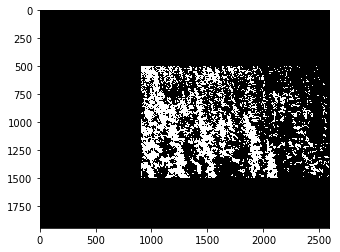

In [40]:
fraction_white_pixels_allw1912 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:1500, 900:] = 255

for jpg in found_jpgs:
    p = Path(jpg)  
    if p.stem.endswith('1200'):  ## only noon pics
        
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 130, 255, cv2.THRESH_BINARY)  ## Create black & white image
        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]
        
        plt.imshow(masked_img,'gray')

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allw1912.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))
        

In [41]:
fraction_white_pixels_allw1915 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:1500, 900:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('1500'):  ## only 15:01 pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 130, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allw1915.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 20%
 fraction_white_pixels 35%
 fraction_white_pixels 36%
 fraction_white_pixels 38%
 fraction_white_pixels 43%
 fraction_white_pixels 49%
 fraction_white_pixels 27%
 fraction_white_pixels 30%
 fraction_white_pixels 37%
 fraction_white_pixels 41%
 fraction_white_pixels 52%
 fraction_white_pixels 44%
 fraction_white_pixels 23%
 fraction_white_pixels 39%
 fraction_white_pixels 41%
 fraction_white_pixels 39%
 fraction_white_pixels 35%
 fraction_white_pixels 42%
 fraction_white_pixels 36%
 fraction_white_pixels 26%
 fraction_white_pixels 42%
 fraction_white_pixels 28%
 fraction_white_pixels 41%
 fraction_white_pixels 30%
 fraction_white_pixels 26%
 fraction_white_pixels 24%
 fraction_white_pixels 44%
 fraction_white_pixels 33%
 fraction_white_pixels 42%
 fraction_white_pixels 24%
 fraction_white_pixels 37%
 fraction_white_pixels 38%
 fraction_white_pixels 44%
 fraction_white_pixels 46%
 fraction_white_pixels 44%
 fraction_white_pixels 30%
 fraction_white_pixels 39%
 

In [42]:
fraction_white_pixels_allw1909 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:1500, 900:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('0900'):  ## only 09:01am pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 130, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allw1909.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 45%
 fraction_white_pixels 18%
 fraction_white_pixels 33%
 fraction_white_pixels 32%
 fraction_white_pixels 29%
 fraction_white_pixels 38%
 fraction_white_pixels 32%
 fraction_white_pixels 43%
 fraction_white_pixels 27%
 fraction_white_pixels 36%
 fraction_white_pixels 40%
 fraction_white_pixels 47%
 fraction_white_pixels 32%
 fraction_white_pixels 26%
 fraction_white_pixels 31%
 fraction_white_pixels 30%
 fraction_white_pixels 28%
 fraction_white_pixels 39%
 fraction_white_pixels 30%
 fraction_white_pixels 26%
 fraction_white_pixels 26%
 fraction_white_pixels 27%
 fraction_white_pixels 26%
 fraction_white_pixels 25%
 fraction_white_pixels 25%
 fraction_white_pixels 37%
 fraction_white_pixels 28%
 fraction_white_pixels 27%
 fraction_white_pixels 45%
 fraction_white_pixels 32%
 fraction_white_pixels 29%
 fraction_white_pixels 26%
 fraction_white_pixels 41%
 fraction_white_pixels 40%
 fraction_white_pixels 37%
 fraction_white_pixels 37%
 fraction_white_pixels 34%
 

169
162
167


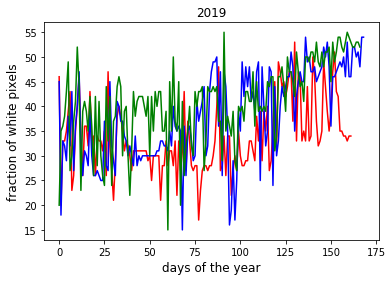

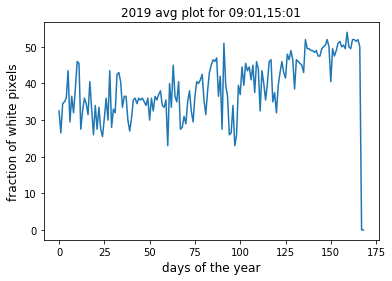

In [43]:
print(len(fraction_white_pixels_allw1909))
print(len(fraction_white_pixels_allw1912))
print(len(fraction_white_pixels_allw1915))
plt.plot(fraction_white_pixels_allw1912, 'r') # red for 12:05pm
plt.plot(fraction_white_pixels_allw1909, 'b') # blue for 09:05am
plt.plot(fraction_white_pixels_allw1915, 'g') # green for 15:05pm
plt.title('2019')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()
fraction_white_pixels_avgw19=np.zeros(len(fraction_white_pixels_allw1909))
for i,snow in enumerate(fraction_white_pixels_allw1915):
    fraction_white_pixels_avgw19[i]=(fraction_white_pixels_allw1909[i] + fraction_white_pixels_allw1915[i])/2
plt.plot(fraction_white_pixels_avgw19)
plt.title('2019 avg plot for 09:01,15:01')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()


In [44]:
dir_source = Path('C:/Users/kkanishk/Desktop/webcam 2018')  # note forward slash
print('Source dir: {}\n'.format(dir_source))
filenames = os.listdir(dir_source)
found_jpgs = []

for f in filenames:
    if fnmatch.fnmatch(f, '*.jpg'):
        f = os.path.join(dir_source, f)  # this works with imread
        found_jpgs.append(f)
print('Found {} JPGs'.format(len(found_jpgs)))

Source dir: C:\Users\kkanishk\Desktop\webcam 2018

Found 2067 JPGs


[C:\Users\kkanishk\Desktop\webcam 2018\CH-DAV_WEBCAM_T1_35_1-201801010700.jpg] Blacks: [2592.] / Whites: [0.]


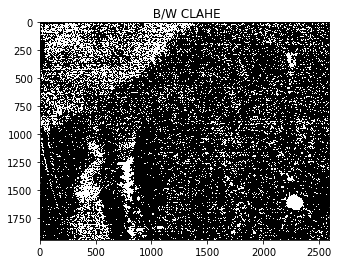

In [45]:
for jpg in found_jpgs:

    # Read file
    gray_img = cv2.imread(jpg, 0)  ## read in grayscale
    plt.imshow(gray_img, cmap="gray")  ## show in grayscale
    plt.title('Image in grayscale')
   
    
    
    # Create a CLAHE object (Arguments are optional)
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
    gray_img_clahe_normalized = clahe.apply(gray_img)    
    plt.imshow(gray_img_clahe_normalized, cmap="gray")  ## show in grayscale
    plt.title('CLAHE')
    
    
    # Normalize histogram
    gray_img_normalized = cv2.equalizeHist(gray_img)
    plt.imshow(gray_img_normalized, cmap="gray")
    plt.title('equalizeHist')
    
    
    
    # Create black & white image
    (thresh, bw_img) = cv2.threshold(gray_img_normalized, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(bw_img, cmap="gray")
    plt.title(' B/W equalizeHist')
   
    
    # Create black & white image
    (thresh, bw_img) = cv2.threshold(gray_img_clahe_normalized, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(bw_img, cmap="gray")
    plt.title(' B/W CLAHE')
       
    
    # Calculate and plot histogram
    # https://www.programcreek.com/python/example/89316/cv2.equalizeHist
    hist = cv2.calcHist(bw_img,[0],None,[256],[0,256])
    
    # Print black and white info
    blacks = hist[0]
    whites = hist[-1]
    print('[{}] Blacks: {} / Whites: {}'.format(jpg, blacks, whites))    
    break

 fraction_white_pixels 39%
 fraction_white_pixels 21%
 fraction_white_pixels 29%
 fraction_white_pixels 38%
 fraction_white_pixels 40%
 fraction_white_pixels 37%
 fraction_white_pixels 31%
 fraction_white_pixels 38%
 fraction_white_pixels 53%
 fraction_white_pixels 38%
 fraction_white_pixels 40%
 fraction_white_pixels 38%
 fraction_white_pixels 39%
 fraction_white_pixels 38%
 fraction_white_pixels 37%
 fraction_white_pixels 30%
 fraction_white_pixels 52%
 fraction_white_pixels 40%
 fraction_white_pixels 31%
 fraction_white_pixels 44%
 fraction_white_pixels 40%
 fraction_white_pixels 81%
 fraction_white_pixels 42%
 fraction_white_pixels 30%
 fraction_white_pixels 32%
 fraction_white_pixels 34%
 fraction_white_pixels 34%
 fraction_white_pixels 34%
 fraction_white_pixels 34%
 fraction_white_pixels 22%
 fraction_white_pixels 43%
 fraction_white_pixels 41%
 fraction_white_pixels 37%
 fraction_white_pixels 32%
 fraction_white_pixels 29%
 fraction_white_pixels 19%
 fraction_white_pixels 37%
 

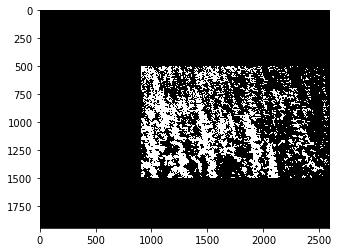

In [46]:
fraction_white_pixels_allw1812 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:1500, 900:] = 255

for jpg in found_jpgs:
    p = Path(jpg)  
    if p.stem.endswith('1200'):  ## only noon pics
        
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 130, 255, cv2.THRESH_BINARY)  ## Create black & white image
        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]
        
        plt.imshow(masked_img,'gray')

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allw1812.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

In [47]:
fraction_white_pixels_allw1815 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:1500, 900:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('1500'):  ## only 15:01 pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 130, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allw1815.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 48%
 fraction_white_pixels 27%
 fraction_white_pixels 19%
 fraction_white_pixels 47%
 fraction_white_pixels 36%
 fraction_white_pixels 35%
 fraction_white_pixels 35%
 fraction_white_pixels 35%
 fraction_white_pixels 48%
 fraction_white_pixels 44%
 fraction_white_pixels 32%
 fraction_white_pixels 36%
 fraction_white_pixels 45%
 fraction_white_pixels 44%
 fraction_white_pixels 33%
 fraction_white_pixels 36%
 fraction_white_pixels 41%
 fraction_white_pixels 44%
 fraction_white_pixels 35%
 fraction_white_pixels 42%
 fraction_white_pixels 22%
 fraction_white_pixels 40%
 fraction_white_pixels 36%
 fraction_white_pixels 42%
 fraction_white_pixels 31%
 fraction_white_pixels 31%
 fraction_white_pixels 40%
 fraction_white_pixels 31%
 fraction_white_pixels 41%
 fraction_white_pixels 40%
 fraction_white_pixels 41%
 fraction_white_pixels 26%
 fraction_white_pixels 47%
 fraction_white_pixels 40%
 fraction_white_pixels 39%
 fraction_white_pixels 42%
 fraction_white_pixels 43%
 

In [48]:
fraction_white_pixels_allw1809 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:1500, 900:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('0900'):  ## only 09:01am pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 130, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allw1809.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 42%
 fraction_white_pixels 24%
 fraction_white_pixels 45%
 fraction_white_pixels 39%
 fraction_white_pixels 37%
 fraction_white_pixels 33%
 fraction_white_pixels 30%
 fraction_white_pixels 34%
 fraction_white_pixels 46%
 fraction_white_pixels 36%
 fraction_white_pixels 33%
 fraction_white_pixels 30%
 fraction_white_pixels 33%
 fraction_white_pixels 33%
 fraction_white_pixels 32%
 fraction_white_pixels 20%
 fraction_white_pixels 39%
 fraction_white_pixels 34%
 fraction_white_pixels 30%
 fraction_white_pixels 44%
 fraction_white_pixels 22%
 fraction_white_pixels 41%
 fraction_white_pixels 85%
 fraction_white_pixels 41%
 fraction_white_pixels 31%
 fraction_white_pixels 30%
 fraction_white_pixels 31%
 fraction_white_pixels 30%
 fraction_white_pixels 32%
 fraction_white_pixels 31%
 fraction_white_pixels 30%
 fraction_white_pixels 19%
 fraction_white_pixels 43%
 fraction_white_pixels 40%
 fraction_white_pixels 38%
 fraction_white_pixels 33%
 fraction_white_pixels 30%
 

167
162
164


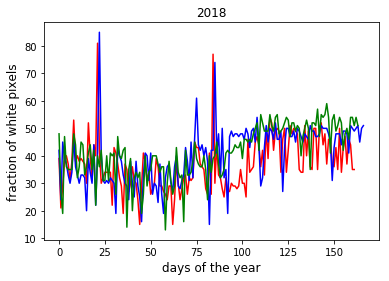

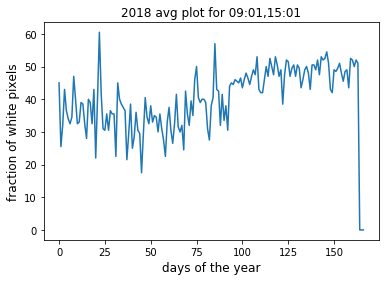

In [49]:
print(len(fraction_white_pixels_allw1809))
print(len(fraction_white_pixels_allw1812))
print(len(fraction_white_pixels_allw1815))
plt.plot(fraction_white_pixels_allw1812, 'r') # red for 12:05pm
plt.plot(fraction_white_pixels_allw1809, 'b') # blue for 09:05am
plt.plot(fraction_white_pixels_allw1815, 'g') # green for 15:05pm
plt.title('2018')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()
fraction_white_pixels_avgw18=np.zeros(len(fraction_white_pixels_allw1809))
for i,snow in enumerate(fraction_white_pixels_allw1815):
    fraction_white_pixels_avgw18[i]=(fraction_white_pixels_allw1809[i] + fraction_white_pixels_allw1815[i])/2
plt.plot(fraction_white_pixels_avgw18)
plt.title('2018 avg plot for 09:01,15:01')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()

In [50]:
dir_source = Path('C:/Users/kkanishk/Desktop/webcam 2017')  # note forward slash
print('Source dir: {}\n'.format(dir_source))
filenames = os.listdir(dir_source)
found_jpgs = []

for f in filenames:
    if fnmatch.fnmatch(f, '*.jpg'):
        f = os.path.join(dir_source, f)  # this works with imread
        found_jpgs.append(f)
print('Found {} JPGs'.format(len(found_jpgs)))

Source dir: C:\Users\kkanishk\Desktop\webcam 2017

Found 2172 JPGs


[C:\Users\kkanishk\Desktop\webcam 2017\CH-DAV_WEBCAM_T1_35_1-201701010700.jpg] Blacks: [2562.] / Whites: [30.]


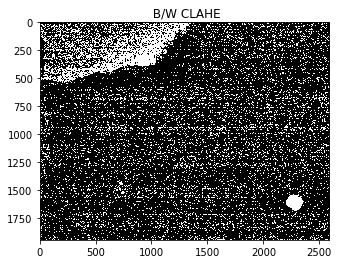

In [51]:
for jpg in found_jpgs:

    # Read file
    gray_img = cv2.imread(jpg, 0)  ## read in grayscale
    plt.imshow(gray_img, cmap="gray")  ## show in grayscale
    plt.title('Image in grayscale')
   
    
    
    # Create a CLAHE object (Arguments are optional)
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
    gray_img_clahe_normalized = clahe.apply(gray_img)    
    plt.imshow(gray_img_clahe_normalized, cmap="gray")  ## show in grayscale
    plt.title('CLAHE')
    
    
    # Normalize histogram
    gray_img_normalized = cv2.equalizeHist(gray_img)
    plt.imshow(gray_img_normalized, cmap="gray")
    plt.title('equalizeHist')
    
    
    
    # Create black & white image
    (thresh, bw_img) = cv2.threshold(gray_img_normalized, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(bw_img, cmap="gray")
    plt.title(' B/W equalizeHist')
   
    
    # Create black & white image
    (thresh, bw_img) = cv2.threshold(gray_img_clahe_normalized, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(bw_img, cmap="gray")
    plt.title(' B/W CLAHE')
       
    
    # Calculate and plot histogram
    # https://www.programcreek.com/python/example/89316/cv2.equalizeHist
    hist = cv2.calcHist(bw_img,[0],None,[256],[0,256])
    
    # Print black and white info
    blacks = hist[0]
    whites = hist[-1]
    print('[{}] Blacks: {} / Whites: {}'.format(jpg, blacks, whites))    
    break

 fraction_white_pixels 48%
 fraction_white_pixels 41%
 fraction_white_pixels 47%
 fraction_white_pixels 45%
 fraction_white_pixels 31%
 fraction_white_pixels 43%
 fraction_white_pixels 38%
 fraction_white_pixels 42%
 fraction_white_pixels 50%
 fraction_white_pixels 41%
 fraction_white_pixels 44%
 fraction_white_pixels 45%
 fraction_white_pixels 34%
 fraction_white_pixels 42%
 fraction_white_pixels 49%
 fraction_white_pixels 50%
 fraction_white_pixels 49%
 fraction_white_pixels 51%
 fraction_white_pixels 50%
 fraction_white_pixels 47%
 fraction_white_pixels 43%
 fraction_white_pixels 40%
 fraction_white_pixels 39%
 fraction_white_pixels 38%
 fraction_white_pixels 38%
 fraction_white_pixels 37%
 fraction_white_pixels 37%
 fraction_white_pixels 32%
 fraction_white_pixels 37%
 fraction_white_pixels 32%
 fraction_white_pixels 35%
 fraction_white_pixels 34%
 fraction_white_pixels 33%
 fraction_white_pixels 34%
 fraction_white_pixels 34%
 fraction_white_pixels 33%
 fraction_white_pixels 46%
 

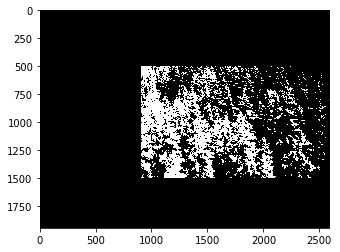

In [52]:
fraction_white_pixels_allw1712 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:1500, 900:] = 255

for jpg in found_jpgs:
    p = Path(jpg)  
    if p.stem.endswith('1200'):  ## only noon pics
        
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 130, 255, cv2.THRESH_BINARY)  ## Create black & white image
        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]
        
        plt.imshow(masked_img,'gray')

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allw1712.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

In [53]:
fraction_white_pixels_allw1715 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:1500, 900:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('1500'):  ## only 15:01 pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 130, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allw1715.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 48%
 fraction_white_pixels 48%
 fraction_white_pixels 46%
 fraction_white_pixels 32%
 fraction_white_pixels 37%
 fraction_white_pixels 42%
 fraction_white_pixels 45%
 fraction_white_pixels 48%
 fraction_white_pixels 40%
 fraction_white_pixels 38%
 fraction_white_pixels 31%
 fraction_white_pixels 44%
 fraction_white_pixels 46%
 fraction_white_pixels 44%
 fraction_white_pixels 46%
 fraction_white_pixels 47%
 fraction_white_pixels 49%
 fraction_white_pixels 49%
 fraction_white_pixels 47%
 fraction_white_pixels 46%
 fraction_white_pixels 44%
 fraction_white_pixels 43%
 fraction_white_pixels 43%
 fraction_white_pixels 44%
 fraction_white_pixels 42%
 fraction_white_pixels 43%
 fraction_white_pixels 16%
 fraction_white_pixels 31%
 fraction_white_pixels 36%
 fraction_white_pixels 37%
 fraction_white_pixels 40%
 fraction_white_pixels 18%
 fraction_white_pixels 37%
 fraction_white_pixels 47%
 fraction_white_pixels 45%
 fraction_white_pixels 40%
 fraction_white_pixels 45%
 

In [54]:
fraction_white_pixels_allw1709 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:1500, 900:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('0900'):  ## only 09:01am pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 130, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_allw1709.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 47%
 fraction_white_pixels 47%
 fraction_white_pixels 44%
 fraction_white_pixels 23%
 fraction_white_pixels 32%
 fraction_white_pixels 39%
 fraction_white_pixels 45%
 fraction_white_pixels 46%
 fraction_white_pixels 40%
 fraction_white_pixels 42%
 fraction_white_pixels 27%
 fraction_white_pixels 46%
 fraction_white_pixels 47%
 fraction_white_pixels 45%
 fraction_white_pixels 43%
 fraction_white_pixels 45%
 fraction_white_pixels 43%
 fraction_white_pixels 41%
 fraction_white_pixels 38%
 fraction_white_pixels 35%
 fraction_white_pixels 35%
 fraction_white_pixels 34%
 fraction_white_pixels 34%
 fraction_white_pixels 35%
 fraction_white_pixels 35%
 fraction_white_pixels 34%
 fraction_white_pixels 34%
 fraction_white_pixels 32%
 fraction_white_pixels 39%
 fraction_white_pixels 44%
 fraction_white_pixels 33%
 fraction_white_pixels 34%
 fraction_white_pixels 32%
 fraction_white_pixels 34%
 fraction_white_pixels 44%
 fraction_white_pixels 47%
 fraction_white_pixels 42%
 

172
174
171


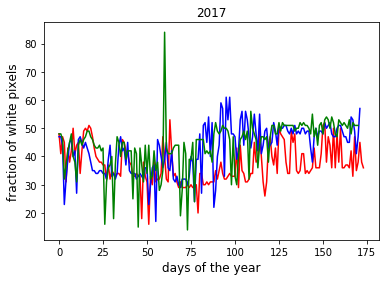

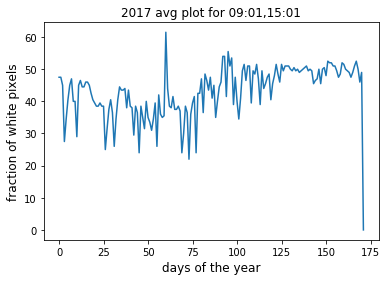

In [55]:
print(len(fraction_white_pixels_allw1709))
print(len(fraction_white_pixels_allw1712))
print(len(fraction_white_pixels_allw1715))
plt.plot(fraction_white_pixels_allw1712, 'r') # red for 12:05pm
plt.plot(fraction_white_pixels_allw1709, 'b') # blue for 09:05am
plt.plot(fraction_white_pixels_allw1715, 'g') # green for 15:05pm
plt.title('2017')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()
fraction_white_pixels_avgw17=np.zeros(len(fraction_white_pixels_allw1709))
for i,snow in enumerate(fraction_white_pixels_allw1715):
    fraction_white_pixels_avgw17[i]=(fraction_white_pixels_allw1709[i] + fraction_white_pixels_allw1715[i])/2
plt.plot(fraction_white_pixels_avgw17)
plt.title('2017 avg plot for 09:01,15:01')
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
plt.show()

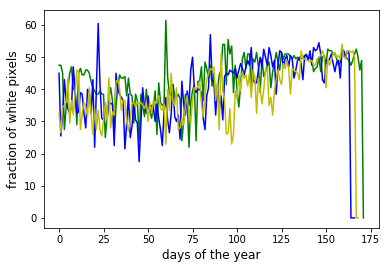

In [56]:
plt.plot(fraction_white_pixels_avgw17, 'g') # green for 2017
plt.plot(fraction_white_pixels_avgw18, 'b') # blue for 2018
plt.plot(fraction_white_pixels_avgw19, 'y') # yellow for 2019
plt.xlabel('days of the year', fontsize=12)
plt.ylabel('fraction of white pixels', fontsize=12)
